In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('C:/Users/anime/OneDrive/Desktop/Courses/Data Mining/housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


About this file
1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea

In [3]:
print(df.shape)
print(df.dtypes)

(20640, 10)
longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


In [4]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Dropping the null values

In [5]:
df3 = df
df3 = df3.dropna()
df3.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

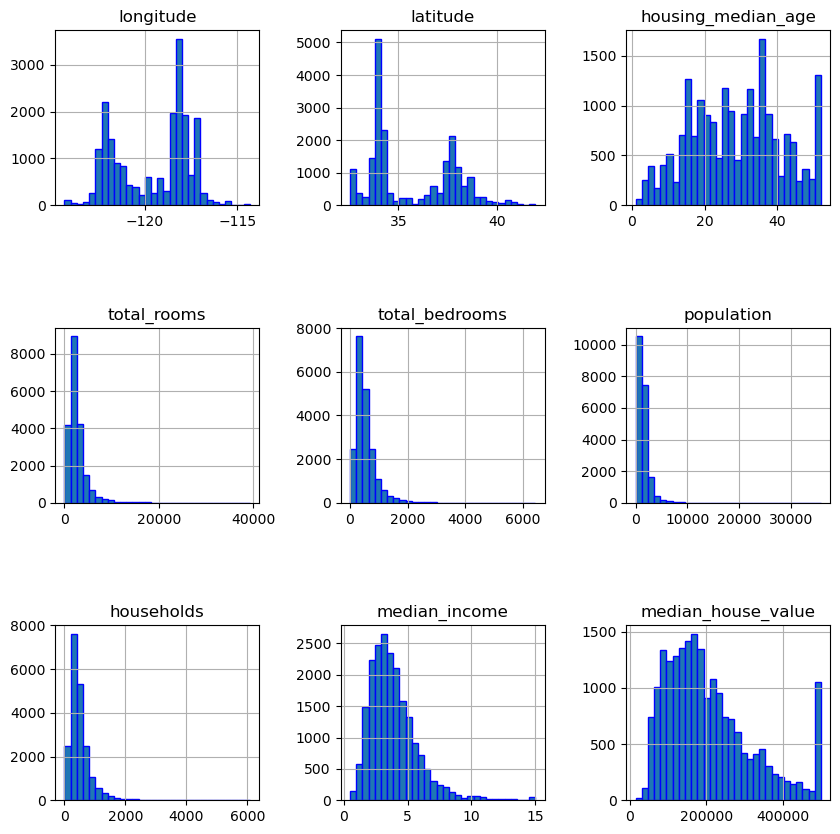

In [6]:
df3.hist(figsize=(10, 10), bins=30, edgecolor="Blue")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

As string data from column ocean_proximity cannot be directly used in the model we have done one hot encoding in the data

In [7]:
encoded_data = pd.get_dummies(df3['ocean_proximity'])

In [8]:
encoded_data

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [9]:
df3 = pd.concat([df3, encoded_data], axis=1)

In [10]:
df3.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0


In [11]:
import seaborn as sns

Text(0.5, 0.98, 'Scatter Matrix Plot')

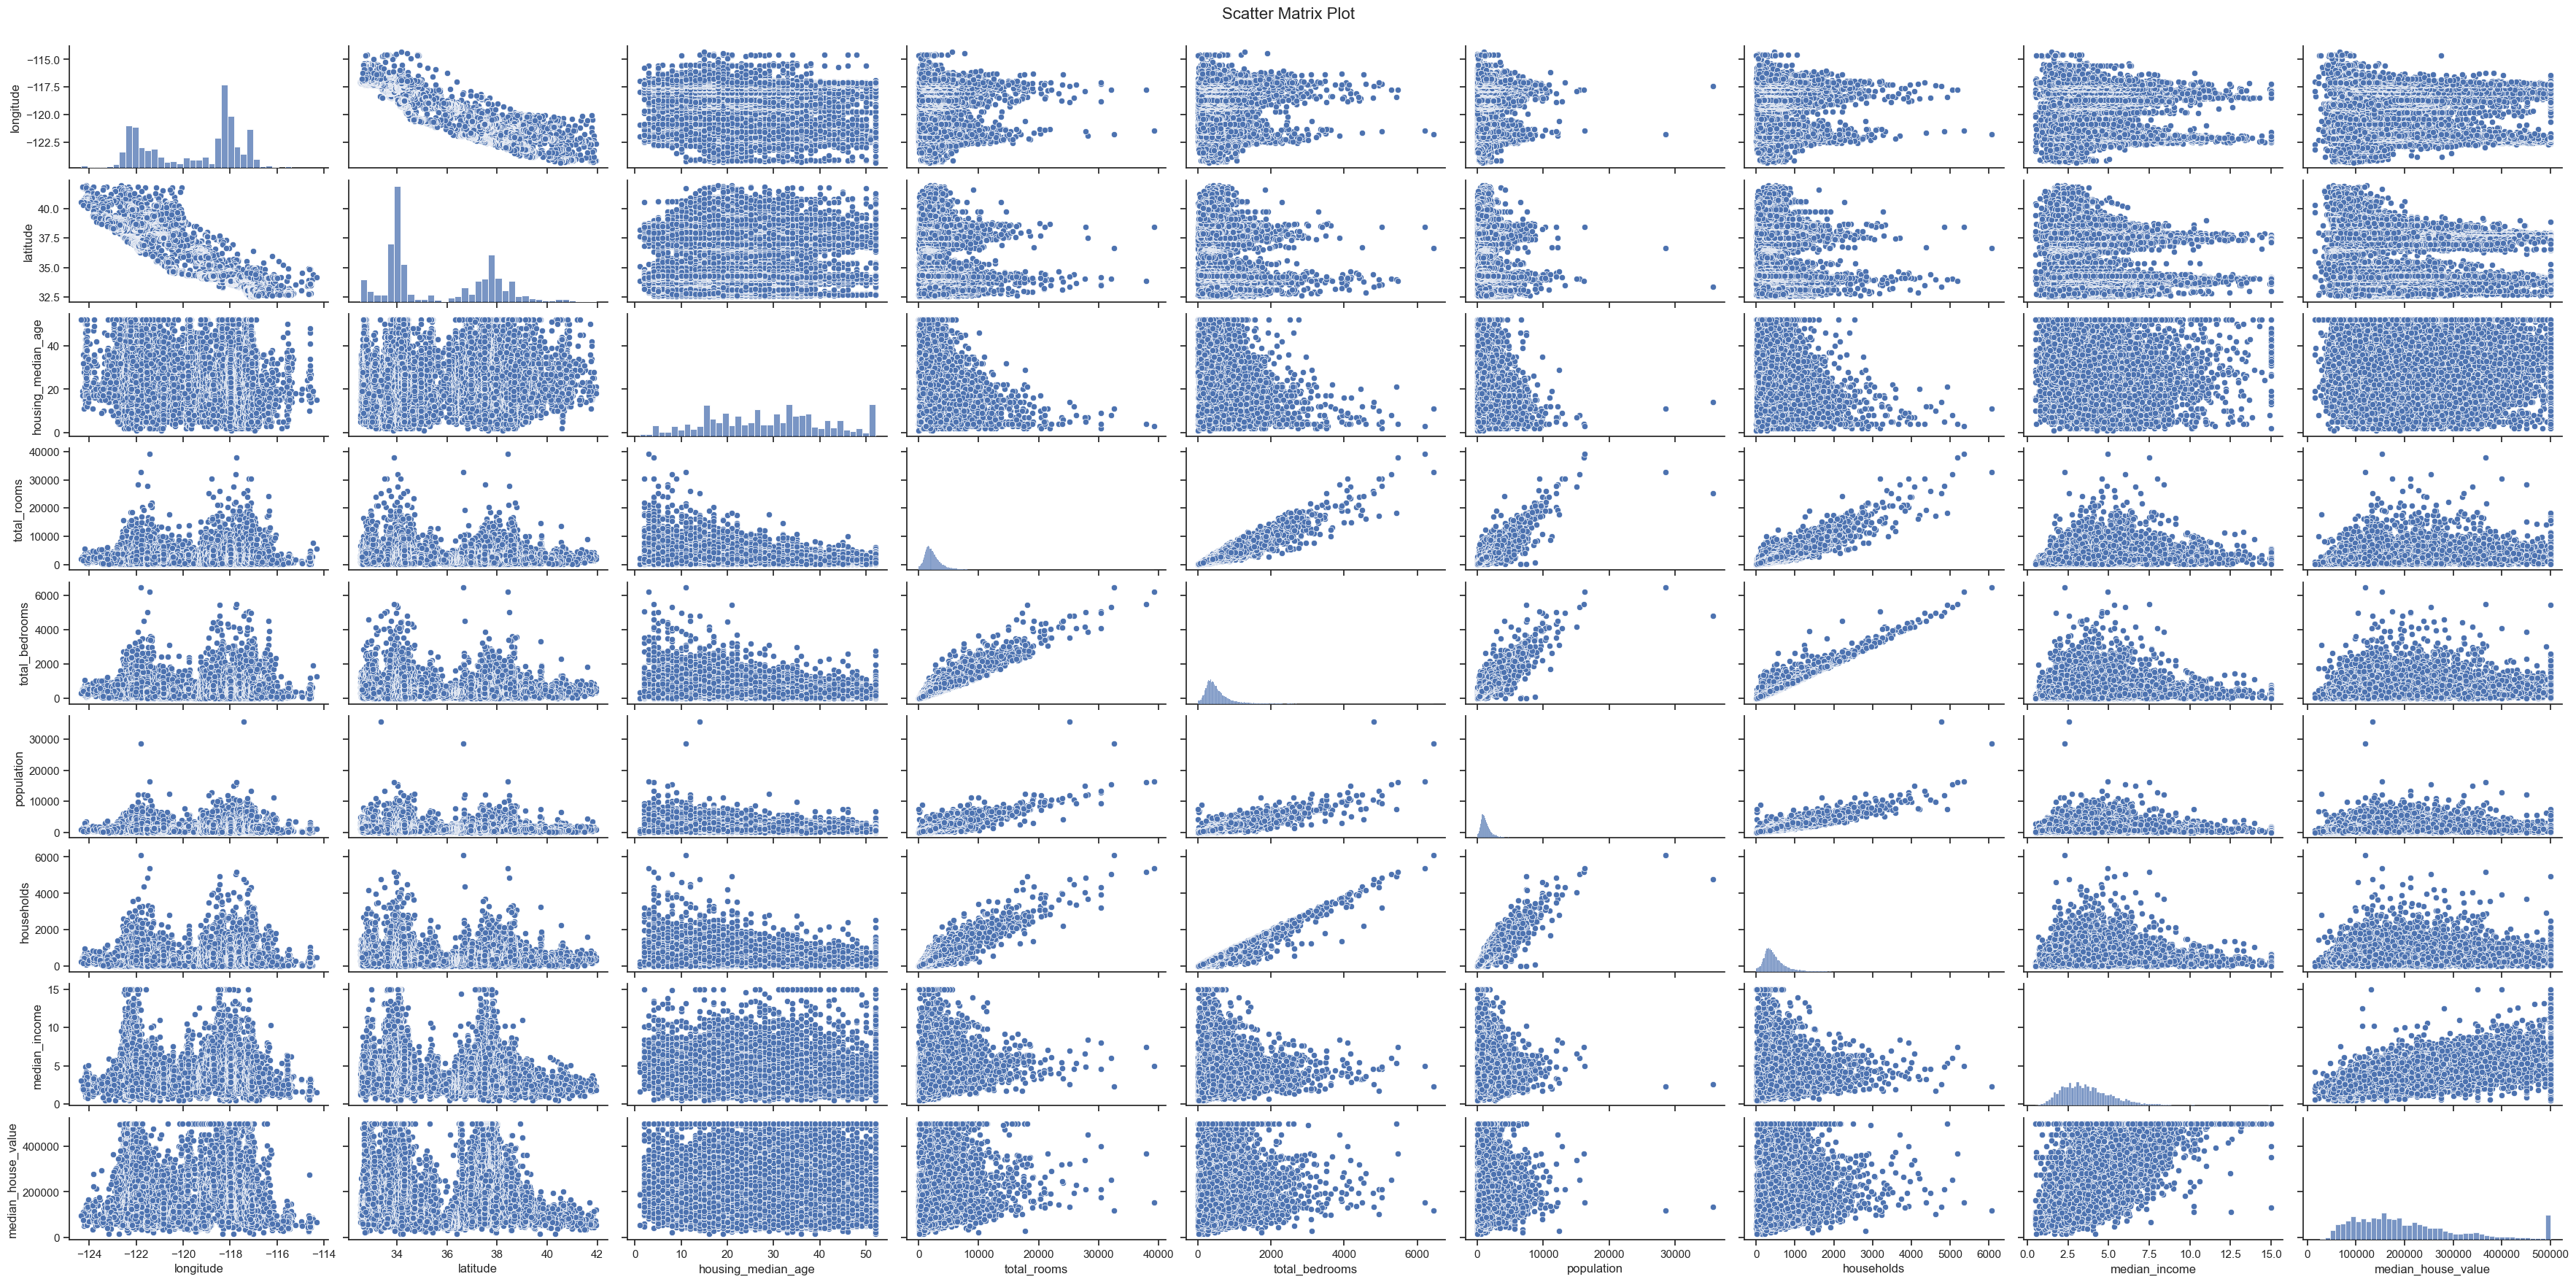

In [12]:
sns.set(style="ticks")
sns.pairplot(df, height=2, aspect=2)

# Adjust the plot layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Scatter Matrix Plot", fontsize=16)

Creating a scatter plot with a regression line to find the relation between median income and median house value

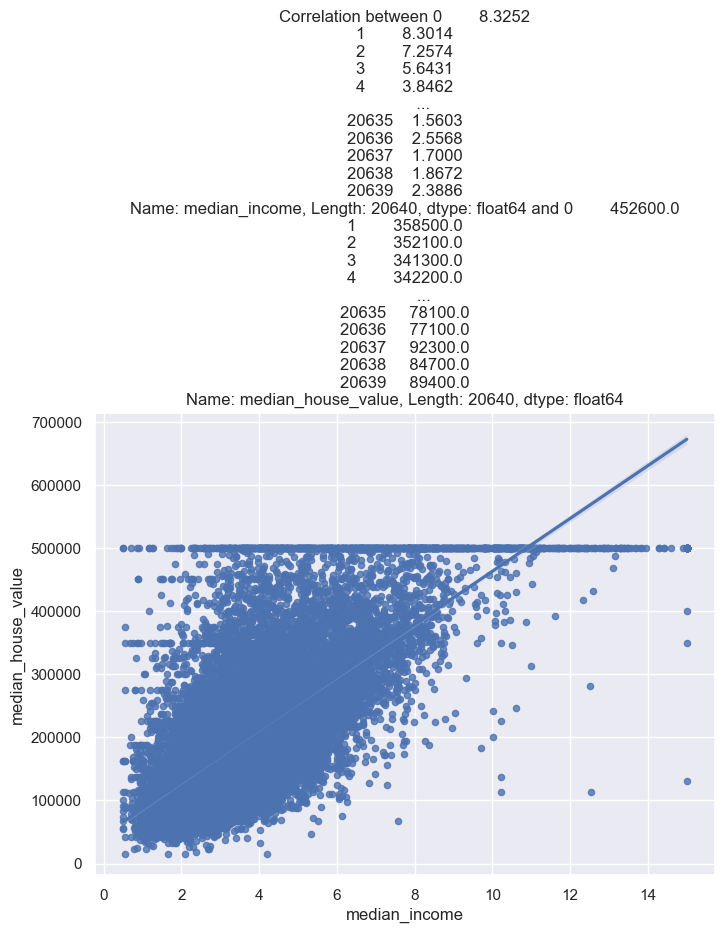

In [13]:
column1 = df['median_income']  
column2 = df['median_house_value']

sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x=column1, y=column2, scatter_kws={'s': 20})

plt.xlabel('median_income')
plt.ylabel('median_house_value')
plt.title(f"Correlation between {column1} and {column2}")

plt.show()

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
df3.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0


In [16]:
Y = df3.iloc[:, -7].values
print(Y)

[452600. 358500. 352100. ...  92300.  84700.  89400.]


In [17]:
df3 = df3.drop('ocean_proximity', axis=1)
df3.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [18]:
df3 = df3.drop('median_house_value', axis=1)
df3.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0


In [19]:
X = df3.iloc[:, :].values
print(X)

[[-122.23   37.88   41.   ...    0.      1.      0.  ]
 [-122.22   37.86   21.   ...    0.      1.      0.  ]
 [-122.24   37.85   52.   ...    0.      1.      0.  ]
 ...
 [-121.22   39.43   17.   ...    0.      0.      0.  ]
 [-121.32   39.43   18.   ...    0.      0.      0.  ]
 [-121.24   39.37   16.   ...    0.      0.      0.  ]]


In [20]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10)
model= LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred=model.predict(X_test)
pd.DataFrame({'Y_Test': y_test,'Y_Pred':y_pred }).head(5)

,Y_Test,Y_Pred
0,407200.0,336243.900628
1,257300.0,312084.441691
2,500001.0,324600.144134
3,125000.0,152686.214356
4,195800.0,272709.090190


Text(0.5, 1.0, 'Predicated VS Actual')

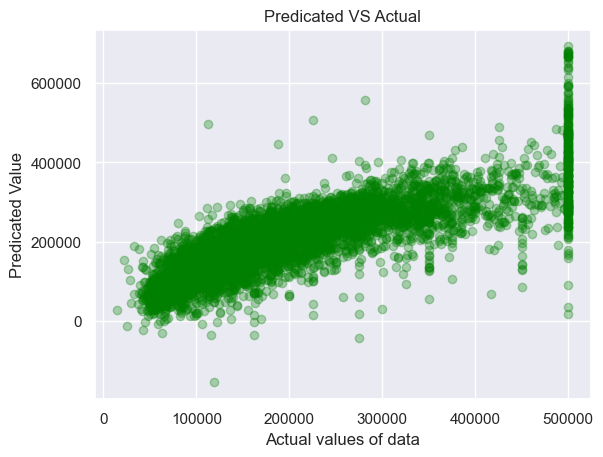

In [22]:
plt.scatter(y_test, y_pred, alpha=0.3,color='green')
plt.xlabel('Actual values of data')
plt.ylabel('Predicated Value')
plt.title('Predicated VS Actual')

In [23]:
from sklearn import metrics
MAE= metrics.mean_absolute_error(y_test, y_pred)
MSE= metrics.mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(MSE)

pd.DataFrame([MAE, MSE, RMSE], index=['MAE', 'MSE', 'RMSE'], columns=['Metrics'])

,Metrics
MAE,4.983473e+04
MSE,4.742003e+09
RMSE,6.886221e+04


In [24]:
model.score(X_train,y_train)

0.6483737988624924

Implementing Ridge Regression

In [25]:
from sklearn.linear_model import Ridge
from sklearn.datasets import load_diabetes

In [26]:
print(X)

[[-122.23   37.88   41.   ...    0.      1.      0.  ]
 [-122.22   37.86   21.   ...    0.      1.      0.  ]
 [-122.24   37.85   52.   ...    0.      1.      0.  ]
 ...
 [-121.22   39.43   17.   ...    0.      0.      0.  ]
 [-121.32   39.43   18.   ...    0.      0.      0.  ]
 [-121.24   39.37   16.   ...    0.      0.      0.  ]]


In [27]:
print(Y)

[452600. 358500. 352100. ...  92300.  84700.  89400.]


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [29]:
from sklearn.metrics import mean_squared_error

In [30]:
alpha = 2.0 
ridge_model = Ridge(alpha=alpha)

ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)

y_pred

array([336269.34916507, 312093.11347613, 324630.70002576, ...,
       286860.32129396, 190463.78949678, 190291.29975074])

In [31]:
ridge_model.score(X_train,y_train)

0.6483328934781375

In [32]:
from sklearn.metrics import mean_squared_error

y_pred = ridge_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 68861.8757823053


Implementing Laaso

In [33]:
from sklearn.linear_model import Lasso

In [34]:
print(X)

[[-122.23   37.88   41.   ...    0.      1.      0.  ]
 [-122.22   37.86   21.   ...    0.      1.      0.  ]
 [-122.24   37.85   52.   ...    0.      1.      0.  ]
 ...
 [-121.22   39.43   17.   ...    0.      0.      0.  ]
 [-121.32   39.43   18.   ...    0.      0.      0.  ]
 [-121.24   39.37   16.   ...    0.      0.      0.  ]]


In [35]:
print(Y)

[452600. 358500. 352100. ...  92300.  84700.  89400.]


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [37]:
alpha = 1.0
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
y_pred

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.516e+12, tolerance: 1.912e+10
  model = cd_fast.enet_coordinate_descent(


array([336236.33074774, 312087.46579554, 324605.7823791 , ...,
       286833.9432296 , 190452.31138222, 190306.51251439])

In [38]:
coefficients = lasso_model.coef_
coefficients

array([-2.64151250e+04, -2.50939476e+04,  1.10765016e+03, -5.01325337e+00,
        9.34776853e+01, -3.59777251e+01,  4.45186893e+01,  3.91581347e+04,
        6.84354053e+03, -3.32982855e+04,  1.57490051e+05,  3.65159339e+03,
        1.22231476e+04])

In [39]:
lasso_model.score(X_train,y_train)

0.6483735820819273

In [40]:
from sklearn.metrics import mean_squared_error

y_pred_lasso = lasso_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_lasso)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 68862.06848148296


1. We have implemented 3 models namely - Linear Regression, Ridge and Lasso Regression.
The Lasso among the three has the highest score.
Also Lasso has as advanatge over Linear regression and Ridge when it comes to feature selection. 
Hence, we can conclude that Lasso has is the  best model for our dataset among the 3.

2. The key coefficients that can be found are median_income & total_bedrooms that have significant impact on the target value.

3. Limitations -  
    There are various limitations for the model like multicollinearity, overfitting, etc.


 Future improvements for the model can be - 
  A. Feature Engineering - The dataset can be continuously monitored and new new features can be extraced from it so that in the future more accurate predictions can be done. 

  B. Hyperparameter tuning - More significant value of Alpha can be found in Ridge and Lasso to improve the performance of algorithm.

  C. Cross validation can be also be done for the same.